In [43]:
from typing import List, Dict, Tuple
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
## Load and Inspect the Dataset

In [45]:
column_names = [
    'wk_file', 'wk_rank',
    'wr_file', 'wr_rank',
    'bk_file', 'bk_rank',
    'optimal_depth'
]

df = pd.read_csv("data/krkopt.data", names=column_names)

In [46]:
df.head()
df.info()
df.describe()
df.shape
df['optimal_depth'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   wk_file        28056 non-null  object
 1   wk_rank        28056 non-null  int64 
 2   wr_file        28056 non-null  object
 3   wr_rank        28056 non-null  int64 
 4   bk_file        28056 non-null  object
 5   bk_rank        28056 non-null  int64 
 6   optimal_depth  28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


optimal_depth
fourteen    4553
thirteen    4194
twelve      3597
eleven      2854
draw        2796
fifteen     2166
ten         1985
nine        1712
eight       1433
seven        683
six          592
five         471
sixteen      390
two          246
four         198
three         81
one           78
zero          27
Name: count, dtype: int64

In [47]:
## Preprocessing the Data
## Convert the chess files a-h to 1-8

In [48]:
file_map = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8}

for col in ['wk_file', 'wr_file', 'bk_file']:
    df[col] = df[col].map(file_map)

In [49]:
## Remove duplicate rows (if any)

In [50]:
df = df.drop_duplicates()

In [51]:
## Basic Visual Analysis
## Histogram of positional features

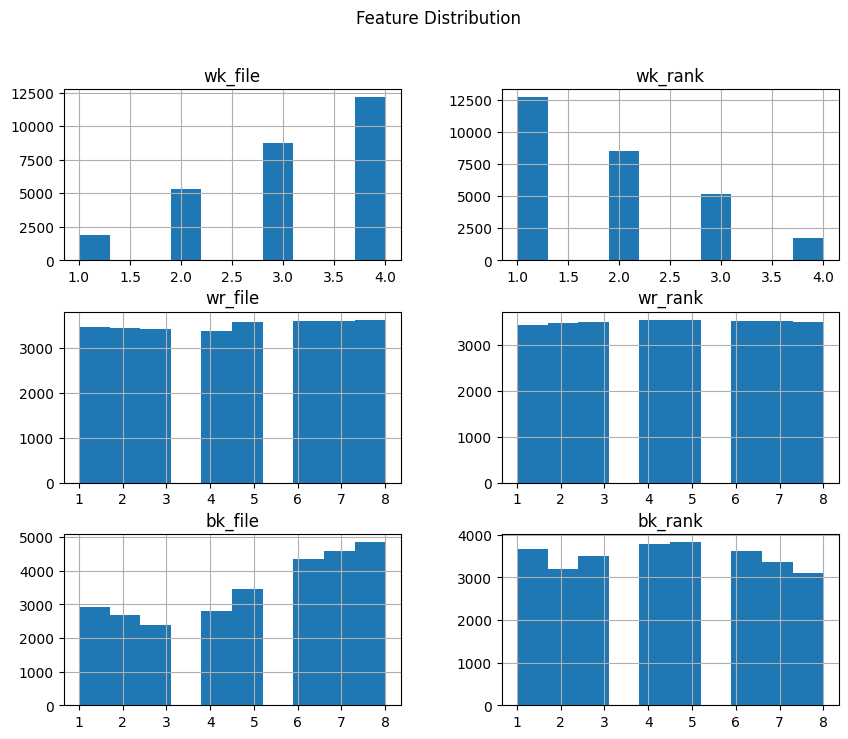

In [52]:
df[['wk_file', 'wk_rank', 'wr_file', 'wr_rank', 'bk_file', 'bk_rank']].hist(figsize=(10,8))
plt.suptitle("Feature Distribution")
plt.show()

In [53]:
## Distribution of Target (optimal_depth)

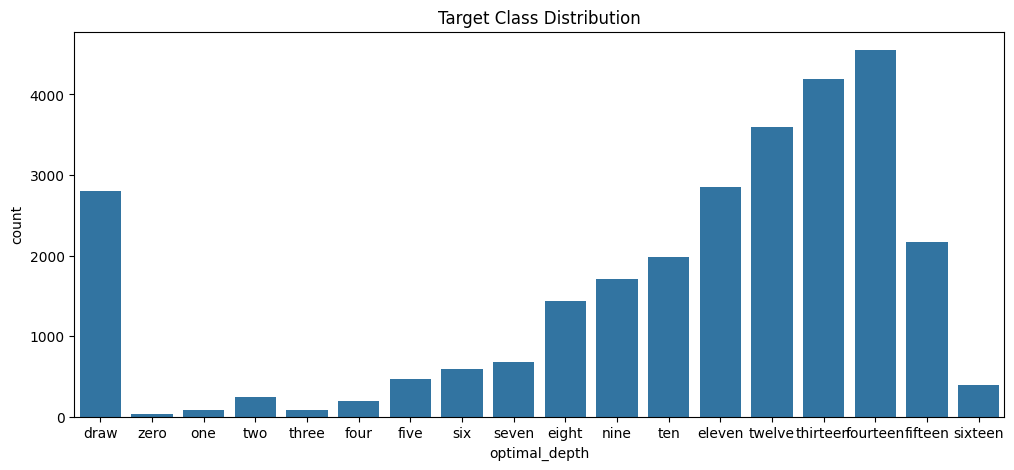

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(x='optimal_depth', data=df)
plt.title("Target Class Distribution")
plt.show()

In [55]:
## Split Data: Train-Test

In [56]:
# Encode categorical variables
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)
# Features and target
X = df_encoded.drop('optimal_depth', axis=1)
y = df_encoded['optimal_depth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
## Decision Tree Model

In [58]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [59]:
## Prediction

In [60]:
y_pred = model.predict(X_test)

In [61]:
## Evaluation Metrics

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8415894511760513

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       559
           1       0.85      0.86      0.85       287
           2       0.85      0.82      0.83       571
           3       0.86      0.85      0.85       433
           4       0.90      0.93      0.91        94
           5       0.82      0.90      0.86        40
           6       0.87      0.86      0.87       911
           7       0.84      0.84      0.84       342
           8       1.00      0.81      0.90        16
           9       0.81      0.84      0.82       137
          10       0.87      0.83      0.85       118
          11       0.77      0.78      0.78        78
          12       0.81      0.85      0.83       397
          13       0.83      0.85      0.84       839
          14       0.69      0.69      0.69        16
          15       0.85      0.86      0.85       720
          16       0.98    

In [63]:
## Confusion Matrix

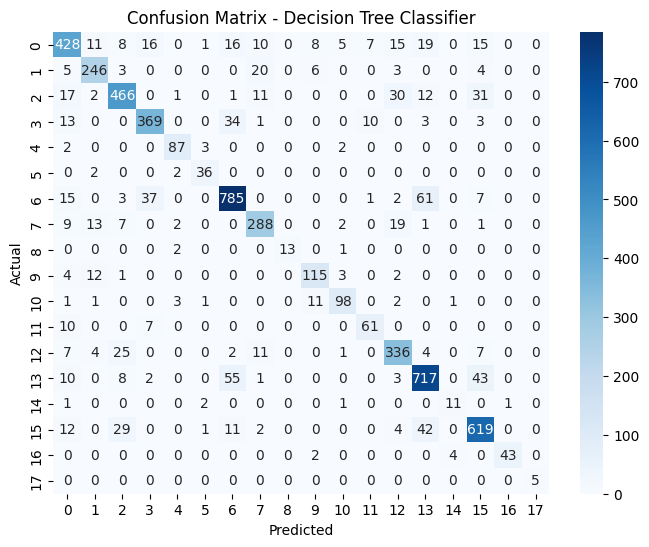

In [64]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
## kNN Model
# Train kNN model

In [87]:
knn = KNeighborsClassifier(n_neighbors=7) # default value
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [88]:
# Make Predictions

In [89]:
y_pred_knn = knn.predict(X_test)

In [90]:
# Evaluate Accuracy and Classification Report

In [91]:
acc = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.7704918032786885

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.97      0.84       559
           1       0.75      0.80      0.78       287
           2       0.73      0.81      0.77       571
           3       0.76      0.83      0.79       433
           4       0.71      0.83      0.76        94
           5       0.80      0.70      0.75        40
           6       0.75      0.85      0.80       911
           7       0.78      0.72      0.75       342
           8       1.00      0.38      0.55        16
           9       0.70      0.61      0.65       137
          10       0.86      0.64      0.73       118
          11       0.87      0.42      0.57        78
          12       0.82      0.61      0.70       397
          13       0.79      0.74      0.76       839
          14       0.75      0.56      0.64        16
          15       0.85      0.67      0.75       720
          16       0.78    

In [ ]:
# Confusion Matrix

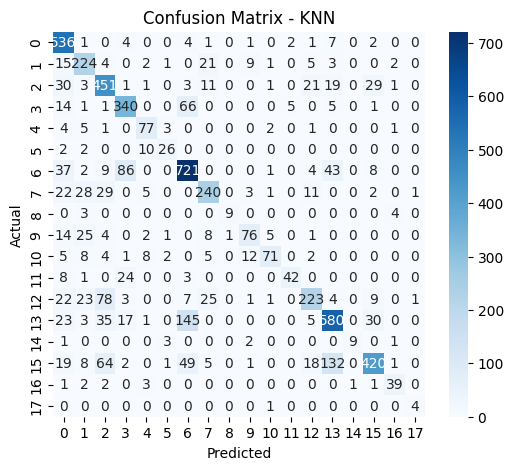

In [70]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()